In [1]:
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import json, io, requests, string
from torch.utils.data.dataset import Dataset
from torchvision import transforms
import pandas as pd
import numpy as np


class CustomDatasetFromImages(Dataset):
    def __init__(self, csv_path):
        """
        Args:
            csv_path (string): path to csv file
            img_path (string): path to the folder where images are
            transform: pytorch transforms for transforms and tensor conversion
        """
        # Transforms
        self.to_tensor = transforms.ToTensor()
        # Read the csv file
        self.data_info = pd.read_csv(csv_path, header=None)
        # First column contains the image paths
        self.image_arr = np.asarray(self.data_info.iloc[:, 0])
        # Second column is the labels
        self.label_arr = np.asarray(self.data_info.iloc[:, 1])
        # Third column is for an operation indicator
        self.operation_arr = np.asarray(self.data_info.iloc[:, 2])
        # Calculate len
        self.data_len = len(self.data_info.index)

    def __getitem__(self, index):
        # Get image name from the pandas df
        single_image_name = self.image_arr[index]
        # Open image
        img_as_img = Image.open(single_image_name)

        # Check if there is an operation
        some_operation = self.operation_arr[index]
        # If there is an operation
        if some_operation:
            # Do some operation on image
            # ...
            # ...
            pass
        # Transform image to tensor
        img_as_tensor = self.to_tensor(img_as_img)

        # Get label(class) of the image based on the cropped pandas column
        single_image_label = self.label_arr[index]

        return (img_as_tensor, single_image_label)

    def __len__(self):
        return self.data_len
if __name__ == "__main__":
    # Define transforms
    
    # Define custom dataset
    train_data = CustomDatasetFromImages("Train0.csv")
    validation_data = CustomDatasetFromImages("Val0.csv")
    


In [2]:
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import FashionMNIST
import torch.optim as optim

preprocessFn = transforms.Compose(
    [transforms.Resize(299),  # 1. Resize smallest side to 256.
     transforms.CenterCrop(299), # 2. Crop the center 224x224 pixels.
     transforms.ToTensor(),
     transforms.Normalize(mean = [0.485, 0.456, 0.406],  # normalize.
                          std = [0.229, 0.224, 0.225])])
print(type(train_data))
# img = []
# labellist = []
imgtensor = torch.zeros(1768,3,299,299)
labeltensor = torch.LongTensor(1768,1).zero_()
counter = 0
for (i, (inputs, labels)) in enumerate(train_data):
    counter += 1
    art= transforms.ToPILImage()(inputs)
    imgtensor[i,:,:,:] = preprocessFn(art).unsqueeze(0)
#     print(labels)
    labeltensor[i,:] = torch.tensor(labels)
    
imgtensorVal = torch.zeros(328,3,299,299)
labeltensorVal = torch.LongTensor(328,1).zero_()
counter = 0
for (i, (inputs, labels)) in enumerate(validation_data):
    counter += 1
    art= transforms.ToPILImage()(inputs)
    imgtensorVal[i,:,:,:] = preprocessFn(art).unsqueeze(0)
#     print(labels) 
    labeltensorVal[i,:] = torch.tensor(labels)
    
print(counter)
# Load the training, and validation datasets.


<class '__main__.CustomDatasetFromImages'>
326


<class 'torch.Tensor'>
torch.Size([3, 299, 299])
Train-epoch 0. Iteration 00010, Avg-Loss: 1.8393, Accuracy: 0.1320
Train-epoch 0. Iteration 00020, Avg-Loss: 1.8376, Accuracy: 0.1500
Train-epoch 0. Iteration 00030, Avg-Loss: 1.8298, Accuracy: 0.1627
Train-epoch 0. Iteration 00040, Avg-Loss: 1.8267, Accuracy: 0.1700
Train-epoch 0. Iteration 00050, Avg-Loss: 1.8207, Accuracy: 0.1672
Train-epoch 0. Iteration 00060, Avg-Loss: 1.8088, Accuracy: 0.1827
Train-epoch 0. Iteration 00070, Avg-Loss: 1.8050, Accuracy: 0.1880
Validation-epoch 0. Avg-Loss: 1.7558, Accuracy: 0.2470
Train-epoch 1. Iteration 00010, Avg-Loss: 1.7969, Accuracy: 0.2040
Train-epoch 1. Iteration 00020, Avg-Loss: 1.8002, Accuracy: 0.1900
Train-epoch 1. Iteration 00030, Avg-Loss: 1.7780, Accuracy: 0.2027
Train-epoch 1. Iteration 00040, Avg-Loss: 1.7720, Accuracy: 0.2040
Train-epoch 1. Iteration 00050, Avg-Loss: 1.7707, Accuracy: 0.2104
Train-epoch 1. Iteration 00060, Avg-Loss: 1.7672, Accuracy: 0.2160
Train-epoch 1. Iteration 

Train-epoch 15. Iteration 00040, Avg-Loss: 1.5394, Accuracy: 0.4450
Train-epoch 15. Iteration 00050, Avg-Loss: 1.5285, Accuracy: 0.4552
Train-epoch 15. Iteration 00060, Avg-Loss: 1.5297, Accuracy: 0.4533
Train-epoch 15. Iteration 00070, Avg-Loss: 1.5369, Accuracy: 0.4480
Validation-epoch 15. Avg-Loss: 1.5079, Accuracy: 0.4817
Train-epoch 16. Iteration 00010, Avg-Loss: 1.5260, Accuracy: 0.4400
Train-epoch 16. Iteration 00020, Avg-Loss: 1.5375, Accuracy: 0.4560
Train-epoch 16. Iteration 00030, Avg-Loss: 1.5342, Accuracy: 0.4520
Train-epoch 16. Iteration 00040, Avg-Loss: 1.5281, Accuracy: 0.4480
Train-epoch 16. Iteration 00050, Avg-Loss: 1.5290, Accuracy: 0.4392
Train-epoch 16. Iteration 00060, Avg-Loss: 1.5193, Accuracy: 0.4447
Train-epoch 16. Iteration 00070, Avg-Loss: 1.5250, Accuracy: 0.4389
Validation-epoch 16. Avg-Loss: 1.4985, Accuracy: 0.5061
Train-epoch 17. Iteration 00010, Avg-Loss: 1.4974, Accuracy: 0.4720
Train-epoch 17. Iteration 00020, Avg-Loss: 1.5303, Accuracy: 0.4380
Trai

Train-epoch 30. Iteration 00070, Avg-Loss: 1.3875, Accuracy: 0.5669
Validation-epoch 30. Avg-Loss: 1.3631, Accuracy: 0.6524
Train-epoch 31. Iteration 00010, Avg-Loss: 1.3338, Accuracy: 0.6280
Train-epoch 31. Iteration 00020, Avg-Loss: 1.3500, Accuracy: 0.6140
Train-epoch 31. Iteration 00030, Avg-Loss: 1.3599, Accuracy: 0.5920
Train-epoch 31. Iteration 00040, Avg-Loss: 1.3652, Accuracy: 0.5860
Train-epoch 31. Iteration 00050, Avg-Loss: 1.3673, Accuracy: 0.5856
Train-epoch 31. Iteration 00060, Avg-Loss: 1.3627, Accuracy: 0.5933
Train-epoch 31. Iteration 00070, Avg-Loss: 1.3647, Accuracy: 0.5926
Validation-epoch 31. Avg-Loss: 1.3496, Accuracy: 0.6494
Train-epoch 32. Iteration 00010, Avg-Loss: 1.3527, Accuracy: 0.5800
Train-epoch 32. Iteration 00020, Avg-Loss: 1.3445, Accuracy: 0.6160
Train-epoch 32. Iteration 00030, Avg-Loss: 1.3290, Accuracy: 0.6267
Train-epoch 32. Iteration 00040, Avg-Loss: 1.3469, Accuracy: 0.6100
Train-epoch 32. Iteration 00050, Avg-Loss: 1.3461, Accuracy: 0.6040
Trai

Train-epoch 46. Iteration 00020, Avg-Loss: 1.2341, Accuracy: 0.6500
Train-epoch 46. Iteration 00030, Avg-Loss: 1.2361, Accuracy: 0.6480
Train-epoch 46. Iteration 00040, Avg-Loss: 1.2413, Accuracy: 0.6430
Train-epoch 46. Iteration 00050, Avg-Loss: 1.2448, Accuracy: 0.6392
Train-epoch 46. Iteration 00060, Avg-Loss: 1.2379, Accuracy: 0.6420
Train-epoch 46. Iteration 00070, Avg-Loss: 1.2432, Accuracy: 0.6400
Validation-epoch 46. Avg-Loss: 1.2341, Accuracy: 0.7165
Train-epoch 47. Iteration 00010, Avg-Loss: 1.2453, Accuracy: 0.6320
Train-epoch 47. Iteration 00020, Avg-Loss: 1.2234, Accuracy: 0.6440
Train-epoch 47. Iteration 00030, Avg-Loss: 1.2334, Accuracy: 0.6267
Train-epoch 47. Iteration 00040, Avg-Loss: 1.2419, Accuracy: 0.6240
Train-epoch 47. Iteration 00050, Avg-Loss: 1.2478, Accuracy: 0.6264
Train-epoch 47. Iteration 00060, Avg-Loss: 1.2499, Accuracy: 0.6233
Train-epoch 47. Iteration 00070, Avg-Loss: 1.2445, Accuracy: 0.6337
Validation-epoch 47. Avg-Loss: 1.2292, Accuracy: 0.7043
Trai

Train-epoch 61. Iteration 00050, Avg-Loss: 1.1535, Accuracy: 0.6760
Train-epoch 61. Iteration 00060, Avg-Loss: 1.1556, Accuracy: 0.6807
Train-epoch 61. Iteration 00070, Avg-Loss: 1.1491, Accuracy: 0.6771
Validation-epoch 61. Avg-Loss: 1.1421, Accuracy: 0.7226
Train-epoch 62. Iteration 00010, Avg-Loss: 1.1567, Accuracy: 0.6360
Train-epoch 62. Iteration 00020, Avg-Loss: 1.1576, Accuracy: 0.6560
Train-epoch 62. Iteration 00030, Avg-Loss: 1.1458, Accuracy: 0.6680
Train-epoch 62. Iteration 00040, Avg-Loss: 1.1497, Accuracy: 0.6690
Train-epoch 62. Iteration 00050, Avg-Loss: 1.1470, Accuracy: 0.6720
Train-epoch 62. Iteration 00060, Avg-Loss: 1.1509, Accuracy: 0.6653
Train-epoch 62. Iteration 00070, Avg-Loss: 1.1524, Accuracy: 0.6709
Validation-epoch 62. Avg-Loss: 1.1413, Accuracy: 0.7226
Train-epoch 63. Iteration 00010, Avg-Loss: 1.1660, Accuracy: 0.6400
Train-epoch 63. Iteration 00020, Avg-Loss: 1.1329, Accuracy: 0.6840
Train-epoch 63. Iteration 00030, Avg-Loss: 1.1271, Accuracy: 0.6867
Trai

Validation-epoch 76. Avg-Loss: 1.0744, Accuracy: 0.7287
Train-epoch 77. Iteration 00010, Avg-Loss: 1.0354, Accuracy: 0.7120
Train-epoch 77. Iteration 00020, Avg-Loss: 1.0831, Accuracy: 0.6720
Train-epoch 77. Iteration 00030, Avg-Loss: 1.0915, Accuracy: 0.6720
Train-epoch 77. Iteration 00040, Avg-Loss: 1.0942, Accuracy: 0.6670
Train-epoch 77. Iteration 00050, Avg-Loss: 1.0850, Accuracy: 0.6736
Train-epoch 77. Iteration 00060, Avg-Loss: 1.0852, Accuracy: 0.6740
Train-epoch 77. Iteration 00070, Avg-Loss: 1.0784, Accuracy: 0.6823
Validation-epoch 77. Avg-Loss: 1.0739, Accuracy: 0.7317
Train-epoch 78. Iteration 00010, Avg-Loss: 1.0549, Accuracy: 0.6920
Train-epoch 78. Iteration 00020, Avg-Loss: 1.0774, Accuracy: 0.6740
Train-epoch 78. Iteration 00030, Avg-Loss: 1.0756, Accuracy: 0.6880
Train-epoch 78. Iteration 00040, Avg-Loss: 1.0678, Accuracy: 0.6940
Train-epoch 78. Iteration 00050, Avg-Loss: 1.0737, Accuracy: 0.6912
Train-epoch 78. Iteration 00060, Avg-Loss: 1.0837, Accuracy: 0.6873
Trai

Train-epoch 92. Iteration 00030, Avg-Loss: 1.0018, Accuracy: 0.7173
Train-epoch 92. Iteration 00040, Avg-Loss: 1.0080, Accuracy: 0.7140
Train-epoch 92. Iteration 00050, Avg-Loss: 1.0198, Accuracy: 0.7080
Train-epoch 92. Iteration 00060, Avg-Loss: 1.0168, Accuracy: 0.7087
Train-epoch 92. Iteration 00070, Avg-Loss: 1.0125, Accuracy: 0.7166
Validation-epoch 92. Avg-Loss: 1.0100, Accuracy: 0.7530
Train-epoch 93. Iteration 00010, Avg-Loss: 1.0553, Accuracy: 0.6840
Train-epoch 93. Iteration 00020, Avg-Loss: 1.0322, Accuracy: 0.7120
Train-epoch 93. Iteration 00030, Avg-Loss: 1.0291, Accuracy: 0.7107
Train-epoch 93. Iteration 00040, Avg-Loss: 1.0251, Accuracy: 0.7100
Train-epoch 93. Iteration 00050, Avg-Loss: 1.0167, Accuracy: 0.7152
Train-epoch 93. Iteration 00060, Avg-Loss: 1.0179, Accuracy: 0.7033
Train-epoch 93. Iteration 00070, Avg-Loss: 1.0122, Accuracy: 0.7069
Validation-epoch 93. Avg-Loss: 1.0082, Accuracy: 0.7409
Train-epoch 94. Iteration 00010, Avg-Loss: 0.9699, Accuracy: 0.6960
Trai

Train-epoch 107. Iteration 00050, Avg-Loss: 0.9651, Accuracy: 0.7152
Train-epoch 107. Iteration 00060, Avg-Loss: 0.9630, Accuracy: 0.7187
Train-epoch 107. Iteration 00070, Avg-Loss: 0.9713, Accuracy: 0.7154
Validation-epoch 107. Avg-Loss: 0.9678, Accuracy: 0.7439
Train-epoch 108. Iteration 00010, Avg-Loss: 0.9556, Accuracy: 0.7120
Train-epoch 108. Iteration 00020, Avg-Loss: 0.9526, Accuracy: 0.7220
Train-epoch 108. Iteration 00030, Avg-Loss: 0.9549, Accuracy: 0.7107
Train-epoch 108. Iteration 00040, Avg-Loss: 0.9506, Accuracy: 0.7160
Train-epoch 108. Iteration 00050, Avg-Loss: 0.9455, Accuracy: 0.7248
Train-epoch 108. Iteration 00060, Avg-Loss: 0.9502, Accuracy: 0.7247
Train-epoch 108. Iteration 00070, Avg-Loss: 0.9495, Accuracy: 0.7257
Validation-epoch 108. Avg-Loss: 0.9607, Accuracy: 0.7500
Train-epoch 109. Iteration 00010, Avg-Loss: 0.9141, Accuracy: 0.7680
Train-epoch 109. Iteration 00020, Avg-Loss: 0.9307, Accuracy: 0.7400
Train-epoch 109. Iteration 00030, Avg-Loss: 0.9428, Accura

Train-epoch 122. Iteration 00060, Avg-Loss: 0.8909, Accuracy: 0.7427
Train-epoch 122. Iteration 00070, Avg-Loss: 0.8946, Accuracy: 0.7411
Validation-epoch 122. Avg-Loss: 0.9299, Accuracy: 0.7530
Train-epoch 123. Iteration 00010, Avg-Loss: 0.8803, Accuracy: 0.7600
Train-epoch 123. Iteration 00020, Avg-Loss: 0.9034, Accuracy: 0.7500
Train-epoch 123. Iteration 00030, Avg-Loss: 0.9183, Accuracy: 0.7400
Train-epoch 123. Iteration 00040, Avg-Loss: 0.9161, Accuracy: 0.7310
Train-epoch 123. Iteration 00050, Avg-Loss: 0.9236, Accuracy: 0.7304
Train-epoch 123. Iteration 00060, Avg-Loss: 0.9163, Accuracy: 0.7347
Train-epoch 123. Iteration 00070, Avg-Loss: 0.9226, Accuracy: 0.7257
Validation-epoch 123. Avg-Loss: 0.9352, Accuracy: 0.7470
Train-epoch 124. Iteration 00010, Avg-Loss: 0.9262, Accuracy: 0.7200
Train-epoch 124. Iteration 00020, Avg-Loss: 0.9196, Accuracy: 0.7220
Train-epoch 124. Iteration 00030, Avg-Loss: 0.9340, Accuracy: 0.7107
Train-epoch 124. Iteration 00040, Avg-Loss: 0.9270, Accura

Train-epoch 137. Iteration 00070, Avg-Loss: 0.8871, Accuracy: 0.7320
Validation-epoch 137. Avg-Loss: 0.9007, Accuracy: 0.7591
Train-epoch 138. Iteration 00010, Avg-Loss: 0.8572, Accuracy: 0.7560
Train-epoch 138. Iteration 00020, Avg-Loss: 0.8513, Accuracy: 0.7560
Train-epoch 138. Iteration 00030, Avg-Loss: 0.8553, Accuracy: 0.7533
Train-epoch 138. Iteration 00040, Avg-Loss: 0.8545, Accuracy: 0.7480
Train-epoch 138. Iteration 00050, Avg-Loss: 0.8630, Accuracy: 0.7488
Train-epoch 138. Iteration 00060, Avg-Loss: 0.8706, Accuracy: 0.7420
Train-epoch 138. Iteration 00070, Avg-Loss: 0.8730, Accuracy: 0.7440
Validation-epoch 138. Avg-Loss: 0.9017, Accuracy: 0.7683
Train-epoch 139. Iteration 00010, Avg-Loss: 0.8533, Accuracy: 0.7680
Train-epoch 139. Iteration 00020, Avg-Loss: 0.8838, Accuracy: 0.7240
Train-epoch 139. Iteration 00030, Avg-Loss: 0.8944, Accuracy: 0.7213
Train-epoch 139. Iteration 00040, Avg-Loss: 0.8794, Accuracy: 0.7370
Train-epoch 139. Iteration 00050, Avg-Loss: 0.8784, Accura

Validation-epoch 152. Avg-Loss: 0.8765, Accuracy: 0.7713
Train-epoch 153. Iteration 00010, Avg-Loss: 0.8119, Accuracy: 0.7400
Train-epoch 153. Iteration 00020, Avg-Loss: 0.8308, Accuracy: 0.7320
Train-epoch 153. Iteration 00030, Avg-Loss: 0.8496, Accuracy: 0.7227
Train-epoch 153. Iteration 00040, Avg-Loss: 0.8438, Accuracy: 0.7330
Train-epoch 153. Iteration 00050, Avg-Loss: 0.8524, Accuracy: 0.7312
Train-epoch 153. Iteration 00060, Avg-Loss: 0.8464, Accuracy: 0.7320
Train-epoch 153. Iteration 00070, Avg-Loss: 0.8527, Accuracy: 0.7303
Validation-epoch 153. Avg-Loss: 0.8730, Accuracy: 0.7500
Train-epoch 154. Iteration 00010, Avg-Loss: 0.8685, Accuracy: 0.7360
Train-epoch 154. Iteration 00020, Avg-Loss: 0.8475, Accuracy: 0.7460
Train-epoch 154. Iteration 00030, Avg-Loss: 0.8390, Accuracy: 0.7440
Train-epoch 154. Iteration 00040, Avg-Loss: 0.8547, Accuracy: 0.7360
Train-epoch 154. Iteration 00050, Avg-Loss: 0.8502, Accuracy: 0.7328
Train-epoch 154. Iteration 00060, Avg-Loss: 0.8606, Accura

Train-epoch 168. Iteration 00010, Avg-Loss: 0.8420, Accuracy: 0.7160
Train-epoch 168. Iteration 00020, Avg-Loss: 0.8167, Accuracy: 0.7340
Train-epoch 168. Iteration 00030, Avg-Loss: 0.8290, Accuracy: 0.7360
Train-epoch 168. Iteration 00040, Avg-Loss: 0.8238, Accuracy: 0.7400
Train-epoch 168. Iteration 00050, Avg-Loss: 0.8234, Accuracy: 0.7408
Train-epoch 168. Iteration 00060, Avg-Loss: 0.8230, Accuracy: 0.7407
Train-epoch 168. Iteration 00070, Avg-Loss: 0.8228, Accuracy: 0.7394
Validation-epoch 168. Avg-Loss: 0.8498, Accuracy: 0.7774
Train-epoch 169. Iteration 00010, Avg-Loss: 0.7820, Accuracy: 0.7960
Train-epoch 169. Iteration 00020, Avg-Loss: 0.7809, Accuracy: 0.7780
Train-epoch 169. Iteration 00030, Avg-Loss: 0.7867, Accuracy: 0.7720
Train-epoch 169. Iteration 00040, Avg-Loss: 0.7962, Accuracy: 0.7690
Train-epoch 169. Iteration 00050, Avg-Loss: 0.7957, Accuracy: 0.7656
Train-epoch 169. Iteration 00060, Avg-Loss: 0.7927, Accuracy: 0.7640
Train-epoch 169. Iteration 00070, Avg-Loss: 0.

Train-epoch 183. Iteration 00020, Avg-Loss: 0.8622, Accuracy: 0.7220
Train-epoch 183. Iteration 00030, Avg-Loss: 0.8265, Accuracy: 0.7387
Train-epoch 183. Iteration 00040, Avg-Loss: 0.8059, Accuracy: 0.7420
Train-epoch 183. Iteration 00050, Avg-Loss: 0.8040, Accuracy: 0.7432
Train-epoch 183. Iteration 00060, Avg-Loss: 0.8076, Accuracy: 0.7447
Train-epoch 183. Iteration 00070, Avg-Loss: 0.8098, Accuracy: 0.7440
Validation-epoch 183. Avg-Loss: 0.8359, Accuracy: 0.7835
Train-epoch 184. Iteration 00010, Avg-Loss: 0.7716, Accuracy: 0.7720
Train-epoch 184. Iteration 00020, Avg-Loss: 0.7968, Accuracy: 0.7540
Train-epoch 184. Iteration 00030, Avg-Loss: 0.7696, Accuracy: 0.7627
Train-epoch 184. Iteration 00040, Avg-Loss: 0.7962, Accuracy: 0.7480
Train-epoch 184. Iteration 00050, Avg-Loss: 0.7939, Accuracy: 0.7552
Train-epoch 184. Iteration 00060, Avg-Loss: 0.7933, Accuracy: 0.7500
Train-epoch 184. Iteration 00070, Avg-Loss: 0.7913, Accuracy: 0.7526
Validation-epoch 184. Avg-Loss: 0.8295, Accura

Train-epoch 198. Iteration 00030, Avg-Loss: 0.7936, Accuracy: 0.7693
Train-epoch 198. Iteration 00040, Avg-Loss: 0.7981, Accuracy: 0.7580
Train-epoch 198. Iteration 00050, Avg-Loss: 0.7867, Accuracy: 0.7592
Train-epoch 198. Iteration 00060, Avg-Loss: 0.7872, Accuracy: 0.7607
Train-epoch 198. Iteration 00070, Avg-Loss: 0.7788, Accuracy: 0.7651
Validation-epoch 198. Avg-Loss: 0.8163, Accuracy: 0.7744
Train-epoch 199. Iteration 00010, Avg-Loss: 0.8546, Accuracy: 0.7040
Train-epoch 199. Iteration 00020, Avg-Loss: 0.8165, Accuracy: 0.7320
Train-epoch 199. Iteration 00030, Avg-Loss: 0.8228, Accuracy: 0.7280
Train-epoch 199. Iteration 00040, Avg-Loss: 0.8214, Accuracy: 0.7330
Train-epoch 199. Iteration 00050, Avg-Loss: 0.8047, Accuracy: 0.7448
Train-epoch 199. Iteration 00060, Avg-Loss: 0.8061, Accuracy: 0.7467
Train-epoch 199. Iteration 00070, Avg-Loss: 0.7951, Accuracy: 0.7554
Validation-epoch 199. Avg-Loss: 0.8160, Accuracy: 0.7683


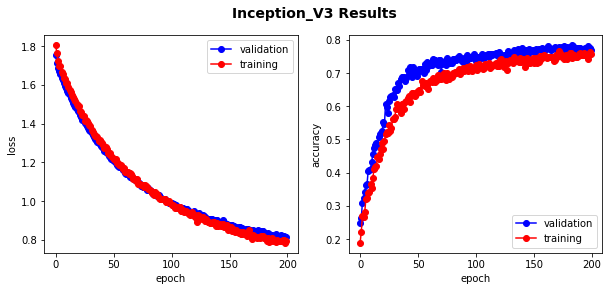

In [7]:
from random import shuffle

inceptionV3 = models.inception_v3(pretrained=True)

inceptionV3.eval()

for param in inceptionV3.parameters():
    param.requires_grad = False
inceptionV3.fc = nn.Linear(2048, 6)
inceptionV3.fc.requires_grad = True

train_accuracies = []; val_accuracies = []
train_losses = []; val_losses = []

trainset = torch.utils.data.TensorDataset(imgtensor, labeltensor)
valset = torch.utils.data.TensorDataset(imgtensorVal, labeltensorVal)


precision = []
recall = []
y_true = []
y_pred = []
y_score = []
y_allscore = []
predictionstash = []
truthstash = []
score_list = []
label_list = []



fp = [0] * 6
tp = [0] * 6
print(type(imgtensor))
print(imgtensor[0].shape)
listofthelists = []

def train_model(model, loss_fn, batchSize, trainset, valset, optimizer, fatherofthelists):
  ypred = [0]

  # Shuffling is needed in case dataset is not shuffled by default.
  train_loader = torch.utils.data.DataLoader(dataset = trainset,
                                              batch_size = batchSize,
                                              shuffle = True)
#   # We don't need to bach the validation set but let's do it anyway.
  val_loader = torch.utils.data.DataLoader(dataset = valset,
                                             batch_size = batchSize,
                                             shuffle = False) # No need.
  
  # Define number of epochs.
  N = 200

  # log accuracies and losses.
  train_accuracies = []; val_accuracies = []
  train_losses = []; val_losses = []

  # GPU enabling.
  model = model.cuda()
  loss_fn = loss_fn.cuda()


  # Training loop. Please make sure you understand every single line of code below.
  # Go back to some of the previous steps in this lab if necessary.
  for epoch in range(0, N):
      y_true.append([])
      y_pred.append([])
      y_score.append([])
      y_allscore.append([])
      correct = 0.0
      cum_loss = 0.0
      ytrue = []
      # Make a pass over the training data.
      model.train()
      for (i, (inputs, labels)) in enumerate(train_loader):
          
          inputs = inputs.cuda()
          labels = labels.cuda()
          #print(inputs.shape)
          #trans = transforms.ToPILImage()
          #img = transforms.ToPILImage()(inputs)
          #pil_img = trans(inputs)
          #input_img =  preprocessFn(pil_img).unsqueeze(0)
          # Forward pass. (Prediction stage)
          scores, _ = model(inputs)
#           print(labels)
          loss = loss_fn(scores, labels.view(-1))
          
#           print(labels.view(-1))
#           print(scores.shape)
          # Count how many correct in this batch.
          max_scores, max_labels = scores.max(1)
#           y_true[-1].append(labels.view(-1))
#           y_pred[-1].append(max_labels)
#           y_score[-1].append(max_scores)
#           y_allscore[-1].append(scores)
#           print(max_labels)
#           print(labels.view(-1))
          correct += (max_labels == labels.view(-1)).sum().item()
          cum_loss += loss.item()
          ypred = ypred + max_labels.tolist()
#           print(ypred)
            
        
#           for k in range(6):
#                 for j in range(len(labels.view(-1))):
#                     if labels.view(-1)[j] == k:
#                         tp[k] += (max_labels[j] == labels.view(-1)[j]).sum().item()
#                         fp[k] += (max_labels[j] != labels.view(-1)[j]).sum().item()
                
            
                
                
          # Zero the gradients in the network.
          optimizer.zero_grad()

          #Backward pass. (Gradient computation stage)
          loss.backward()

          # Parameter updates (SGD step) -- if done with torch.optim!
          optimizer.step()
          # Parameter updates (SGD step) -- if done manually!
          # for param in model.parameters():
          #   param.data.add_(-learningRate, param.grad)

          # Logging the current results on training.
          if (i + 1) % 10 == 0:
              print('Train-epoch %d. Iteration %05d, Avg-Loss: %.4f, Accuracy: %.4f' % 
                    (epoch, i + 1, cum_loss / (i + 1), correct / ((i + 1) * batchSize)))
      fatherofthelists.append(ypred)
          
      train_accuracies.append(correct / len(trainset))
      train_losses.append(cum_loss / (i + 1))   

      # Make a pass over the validation data.
      correct = 0.0
      cum_loss = 0.0
      model.eval()

      score_list = []
      label_list = []

      for (i, (inputs, labels)) in enumerate(val_loader):
           inputs = inputs.cuda()
           labels = labels.cuda()


#           # Forward pass. (Prediction stage)
           scores = model(inputs)
           cum_loss += loss_fn(scores, labels.view(-1)).item()
           score_list.append(scores.cpu().tolist())
           label_list.append(labels.view(-1).cpu().tolist())
#            # Count how many correct in this batch.
           max_scores, max_labels = scores.max(1)
           correct += (max_labels == labels.view(-1)).sum().item()

      val_accuracies.append(correct / len(valset))
      val_losses.append(cum_loss / (i + 1))
      
      # Logging the current results on validation.
      print('Validation-epoch %d. Avg-Loss: %.4f, Accuracy: %.4f' % 
            (epoch, cum_loss / (i + 1), correct / len(valset)))
    
  fig = plt.figure(figsize = (10, 4))
  fig.suptitle('Inception_V3 Results', fontsize=14, fontweight='bold')
  plt.subplot(1, 2, 1)
  plt.plot(val_losses, 'bo-', label = 'val-loss')
  plt.plot(train_losses, 'ro-', label = 'train-loss') 
  plt.ylabel('loss')
  plt.xlabel('epoch') 
  plt.legend(['validation', 'training'], loc='upper right')

  plt.subplot(1, 2, 2)
  plt.plot(val_accuracies, 'bo-', label = 'val-acc')
  plt.plot(train_accuracies, 'ro-', label = 'train-acc')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['validation', 'training'], loc='lower right')
  plt.show()      


      
model = inceptionV3
loss_fn = nn.CrossEntropyLoss()
    
# Create the model.
import torch.nn.functional as F
# Optimizer.
learningRate = 1e-5
optimizer = optim.Adam(model.parameters(), lr = learningRate)
batchSize = 25

train_model(model, loss_fn, batchSize, trainset, valset, optimizer, listofthelists )



66
5
66
5
6
328
328


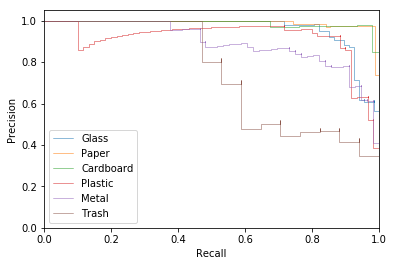

In [4]:
#Confusion Matrix Part
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix

from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import unique_labels

import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import json, io, requests, string
from torch.utils.data.dataset import Dataset
from torchvision import transforms
import pandas as pd
import numpy as np

class_names = ['Glass', 'Paper', 'Cardboard', 'Plastic', 'Metal', 'Trash' ]


def precisionrecall():
    batchSize = 5
#     model_load = torch.load("D:/trainedmodel_inceptionV3.pth")
    val_loader = torch.utils.data.DataLoader(dataset = valset,
                                             batch_size = batchSize,
                                             shuffle = False) # No need.
    model_load = model

    model_load.eval()


    score_list = []
    label_list = []
    
    
    for (i, (inputs, labels)) in enumerate(val_loader):
        
        inputs = inputs.cuda()
        labels = labels.cuda()

        #           # Forward pass. (Prediction stage)
        scores = model_load(inputs)
        
        #            # Count how many correct in this batch.
        max_scores, max_labels = scores.max(1)
        
#         stores the scores and labels for computation of the precision recall curve
        score_list.append(scores.cpu().tolist())
        label_list.append(labels.view(-1).cpu().tolist())
        
    scoreholder = [[] for i in range(0,6)]

    class_counter = 0
    
    for class_counter in range(0,6):
        for i in score_list:
            for counter in  range(0,len(i)):
                try:
                    scoreholder[class_counter].append(i[counter][class_counter])
                except IndexError:
                    print(i)
                    break


    precision = []

    ## Here we merge the datas of each epoch in tensor form (concantation)
    ypred_list = []
    ytrue_list = []

    for element in label_list:
        for subelement in element:

            ytrue_list.append(subelement)

    x = label_binarize(ytrue_list, classes=[0, 1, 2, 3, 4, 5])
    
    
    
    precision= [0]*6
    recall = [0]*6
    average_precision = [0] * 6
    for i in range(0,6):
        precision[i], recall[i], _ = precision_recall_curve(x[:, i], np.asarray(scoreholder[i]))

        average_precision[i] = average_precision_score(x[:, i], np.asarray(scoreholder[i]))


    for i in range(0,6):
        plt.step(recall[i], precision[i], label= class_names[i], linewidth = 0.5)
    plt.legend()

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
#     plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
#               average_precision[1]))
    plt.savefig('precision-recall-inceptionv3.png', dpi = 720)

    


                          
precisionrecall()

In [ ]:
id = 5
rank = -2
picminclone = []
for bigcounter in range(6):
    id = bigcounter
    # print(piclist)
    for j in range(len(piclist)):
        picminclone.append(piclist[j][rank].clone())

    for t, m, s in zip(picminclone[id], [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]):
      t.mul_(s).add_(m)
    # Re-arrange dimensions so it is height x width x channels.
    plt.imshow(picminclone[id].cpu().transpose(0,2).transpose(0,1));
    plt.grid(False); plt.axis('off'); plt.figure()

In [ ]:
id = 5
rank = -2
picminclone = []
for bigcounter in range(6):
    id = bigcounter
    # print(piclist)
    for j in range(len(piclistmax)):
        picminclone.append(piclistmax[j][rank].clone())

    for t, m, s in zip(picminclone[id], [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]):
      t.mul_(s).add_(m)
    # Re-arrange dimensions so it is height x width x channels.
    plt.imshow(picminclone[id].cpu().transpose(0,2).transpose(0,1));
    plt.grid(False); plt.axis('off'); plt.figure()

In [ ]:
scoreholder = [[0] for i in range(0,6)]

class_counter = 0
for class_counter in range(0,6):
    for i in y_allscore[-1]:
        for counter in  range(0,len(i)):
            try:
                scoreholder[class_counter].append(i[counter][class_counter].item())
            except IndexError:
                print(i)
                break
        

In [ ]:
#Confusion Matrix Part
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import unique_labels
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix


normalize = True
tensorino = torch.tensor([1])
ytrue_list = []
for element in y_true:
    tensorino = torch.tensor([1])
    for subelement in element:
#         print(subelement)
        tensorino = torch.cat((tensorino, subelement.cpu()), 0)
    ytrue_list.append(tensorino)
    
ypred_list = []    
for element in y_pred:
    tensorino = torch.tensor([1])
    for subelement in element:
#         print(subelement)
        tensorino = torch.cat((tensorino, subelement.cpu()), 0)
    ypred_list.append(tensorino)
    
# print(tensorino)

print(np.asarray(ytrue_list[-1].tolist()))
class_names = ['Glass', 'Paper', 'Cardboard', 'Plastic', 'Metal', 'Trash' ]
print(confusion_matrix(ytrue_list[-1], ypred_list[-1]))

# plot_confusion_matrix(np.asarray(ytrue_list[-1].tolist()), np.asarray(ypred_list[-1].tolist()), classes=class_names,
#                       normalize=False)
cm = confusion_matrix(ytrue_list[-1],ypred_list[-1])
piun = [0]*6
for i in range(0, cm.shape[1]):
    piun[i] =  np.ndarray.tolist(np.divide(cm[i],np.sum(cm[i])))

cm = np.asarray(piun)
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap = plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
ax.set(xticks=np.arange(cm.shape[1]),
        yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
        xticklabels=class_names, yticklabels=class_names,
        title="Confusion Matrix",
        ylabel='True label',
        xlabel='Predicted label')
thresh = cm.max() / 1.5 if normalize else cm.max() / 2
for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    else:
        plt.text(j, i, "{:,}".format(cm[i, j]),
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")
plt.xticks( rotation=30)
print(cm)
plt.imshow(cm, cmap = plt.cm.Blues)


In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix

precision = []
# print(y_score)
## Here we merge the datas of each epoch in tensor form (concantation)
ypred_list = []

for element in y_true:
    tensorino = torch.tensor([1])
    for subelement in element:
        tensorino = torch.cat((tensorino, subelement.cpu()), 0)
    ytrue_list.append(tensorino)
    

x = label_binarize(ytrue_list[-1], classes=[0, 1, 2, 3, 4, 5])
# y = label_binarize(ypred_list[-1], classes=[0, 1, 2, 3, 4, 5])

precision= [0]*6
recall = [0]*6
average_precision = [0] * 6
# print(np.asarray(scoreholder[0]))
for i in range(0,6):
    precision[i], recall[i], _ = precision_recall_curve(x[:, i], np.asarray(scoreholder[i]))

    average_precision[i] = average_precision_score(x[:, i], np.asarray(scoreholder[i]))




ardor = []
ardor_2 = []
precision_list = []

for i in precision:
    for j in i:
        ardor.append(j)
        
for i in recall:
    for j in i:
        ardor_2.append(j) 
        
for i in average_precision:
        precision_list.append(j)  
        
# print(ardor)
for i in range(0,6):
    plt.step(recall[i], precision[i], label= class_names[i], linewidth = 0.5)
plt.legend()
# plt.fill_between(recall, precision, alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision[1]))
plt.savefig('precision-recall.png', dpi = 720)

In [ ]:
torch.save(model, "D:/trainedmodel_inceptionV3.pth")

66
5
66
5
6
328
328


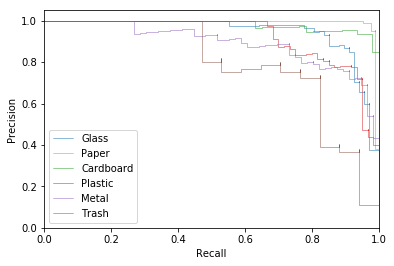

In [6]:
#Confusion Matrix Part
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix

from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import unique_labels

import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import json, io, requests, string
from torch.utils.data.dataset import Dataset
from torchvision import transforms
import pandas as pd
import numpy as np

class_names = ['Glass', 'Paper', 'Cardboard', 'Plastic', 'Metal', 'Trash' ]

score_list = []
label_list = []
ypred_list = []
y_pred = []
ytrue_list = []

def precisionrecall():
    batchSize = 5
    
    val_loader = torch.utils.data.DataLoader(dataset = valset,
                                             batch_size = batchSize,
                                             shuffle = False) # No need.
    model_load = model
    model_load = torch.load("D:/trainedmodel_inceptionV3.pth")
    model_load.eval()



    
    
    for (i, (inputs, labels)) in enumerate(val_loader):
        
        inputs = inputs.cuda()
        labels = labels.cuda()

        #           # Forward pass. (Prediction stage)
        scores = model_load(inputs)
        
        #            # Count how many correct in this batch.
        max_scores, max_labels = scores.max(1)
        y_pred.append(max_labels.cpu().tolist())

#         stores the scores and labels for computation of the precision recall curve
        score_list.append(scores.cpu().tolist())
        label_list.append(labels.view(-1).cpu().tolist())
        
    scoreholder = [[] for i in range(0,6)]

    class_counter = 0
    
    for class_counter in range(0,6):
        for i in score_list:
            for counter in  range(0,len(i)):
                try:
                    scoreholder[class_counter].append(i[counter][class_counter])
                except IndexError:
                    print(i)
                    break
                    
    for i in y_pred:
        for counter in  i:
            ypred_list.append(counter)
               


    precision = []

    ## Here we merge the datas of each epoch in tensor form (concantation)

    print(len(label_list))
    print(len(label_list[0]))
    
    print(len(score_list))
    print(len(score_list[0]))
    print(len(score_list[0][0]))
    
    for element in label_list:
        for subelement in element:

            ytrue_list.append(subelement)

    x = label_binarize(ytrue_list, classes=[0, 1, 2, 3, 4, 5])
    
    print(len(scoreholder[0]))
    print(len(x))
    
    
    precision= [0]*6
    recall = [0]*6
    average_precision = [0] * 6
    for i in range(0,6):
        precision[i], recall[i], _ = precision_recall_curve(x[:, i], np.asarray(scoreholder[i]))

        average_precision[i] = average_precision_score(x[:, i], np.asarray(scoreholder[i]))


    for i in range(0,6):
        plt.step(recall[i], precision[i], label= class_names[i], linewidth = 0.5)
    plt.legend()

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
#     plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
#               average_precision[1]))
    plt.savefig('precision-recall-inceptionv3.png', dpi = 720)

    


                          
precisionrecall()

[2 3 0 0 0 2 4 5 0 1 2 4 1 0 0 0 1 5 3 2 3 1 0 3 0 3 3 4 1 1 0 1 2 1 0 3 3
 4 4 4 3 1 2 0 4 4 2 0 5 1 1 1 2 2 3 0 3 2 4 4 0 4 0 5 0 2 0 2 1 3 2 5 4 1
 1 1 1 0 1 4 0 2 3 4 2 0 3 1 0 1 0 1 3 2 4 1 0 3 1 1 2 0 2 3 3 0 4 3 2 3 1
 0 3 2 3 3 2 2 4 4 0 2 2 2 1 4 0 1 3 0 4 3 0 1 1 3 5 3 3 1 0 3 1 3 3 0 4 0
 1 0 0 1 4 3 4 3 0 1 0 0 3 2 0 3 3 4 2 3 5 0 1 0 3 0 1 3 3 1 0 5 2 1 1 2 0
 1 5 1 4 2 1 1 2 4 1 4 3 1 4 1 3 1 4 2 1 0 1 4 1 4 2 2 1 2 3 4 5 1 1 3 2 0
 5 0 1 1 2 1 1 1 3 0 3 0 5 1 1 3 2 0 0 0 1 0 0 0 2 1 4 4 1 0 0 5 1 5 1 1 5
 4 2 1 1 4 1 2 3 0 4 1 4 3 3 4 5 2 4 3 5 1 1 1 4 3 4 4 1 2 4 2 0 3 3 4 3 1
 4 1 1 4 4 0 4 3 4 3 4 4 4 4 1 1 3 1 0 1 3 0 4 2 0 4 2 3 0 1 0 0]
[[56  0  0  3  8  0]
 [ 0 79  0  0  0  3]
 [ 1  1 43  1  0  0]
 [ 4  1  0 53  1  1]
 [ 6  1  0  3 46  0]
 [ 0  0  1  1  2 13]]
[[0.8358209  0.         0.         0.04477612 0.11940299 0.        ]
 [0.         0.96341463 0.         0.         0.         0.03658537]
 [0.02173913 0.02173913 0.93478261 0.02173913 0.         0.        ]


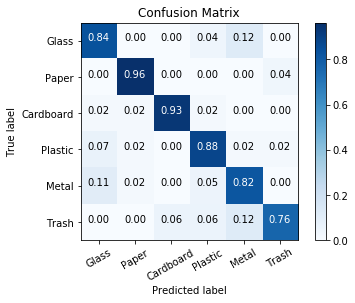

In [7]:
#Confusion Matrix Part
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import unique_labels
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix


normalize = True
tensorino = torch.tensor([1])
ytrue_list = []

for element in label_list:
        for subelement in element:

            ytrue_list.append(subelement)

    
# print(tensorino)

print(np.asarray(ytrue_list))
class_names = ['Glass', 'Paper', 'Cardboard', 'Plastic', 'Metal', 'Trash' ]
print(confusion_matrix(ytrue_list, ypred_list))

# plot_confusion_matrix(np.asarray(ytrue_list[-1].tolist()), np.asarray(ypred_list[-1].tolist()), classes=class_names,
#                       normalize=False)
cm = confusion_matrix(ytrue_list,ypred_list)
piun = [0]*6
for i in range(0, cm.shape[1]):
    piun[i] =  np.ndarray.tolist(np.divide(cm[i],np.sum(cm[i])))

cm = np.asarray(piun)
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap = plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
ax.set(xticks=np.arange(cm.shape[1]),
        yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
        xticklabels=class_names, yticklabels=class_names,
        title="Confusion Matrix",
        ylabel='True label',
        xlabel='Predicted label')
thresh = cm.max() / 1.5 if normalize else cm.max() / 2
for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    else:
        plt.text(j, i, "{:,}".format(cm[i, j]),
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")
plt.xticks( rotation=30)
print(cm)
plt.imshow(cm, cmap = plt.cm.Blues)
